In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# prefill decode performance

In [18]:
no_chunck_result = pd.read_csv(
    "iter_level/backup/not_chunks_result_continuous_scheduling_policy.csv"
)
no_chunck_result = no_chunck_result[no_chunck_result["batch_size"]!=512]

In [19]:
no_chunck_result

,latency,request_round,request_nums,token_nums,prefill_token_num_each_request,cvs,current_stages,wasted_block_sizes,total_block_sizes,throughput,batch_size,request_num,random_seed,strategy,enable_chunk_prefill,policy
2560,0.030387,1,1,21,"[('0', 20)]",0.000000,prefill,11,32,691.075871,1,1,10,hybrid,False,fcfs
2561,0.020177,2,1,1,[],0.000000,decode,10,32,49.561658,1,1,10,hybrid,False,fcfs
2562,0.019972,3,1,1,[],0.000000,decode,9,32,50.069883,1,1,10,hybrid,False,fcfs
2563,0.019907,4,1,1,[],0.000000,decode,8,32,50.234795,1,1,10,hybrid,False,fcfs
2564,0.019876,5,1,1,[],0.000000,decode,7,32,50.312529,1,1,10,hybrid,False,fcfs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0.019830,489,93,1,[],1.051181,decode,9,752,50.429279,256,256,10,hybrid,False,fcfs
5956,0.019832,490,93,1,[],1.051181,decode,8,752,50.423823,256,256,10,hybrid,False,fcfs
5957,0.019822,491,93,1,[],1.051181,decode,7,752,50.449903,256,256,10,hybrid,False,fcfs
5958,0.019814,492,93,1,[],1.051181,decode,6,752,50.469328,256,256,10,hybrid,False,fcfs


In [31]:
no_chunck_result[no_chunck_result["current_stages"] == "prefill"][
    ["token_nums", "throughput", "latency"]
].sort_values(by='token_nums')

,token_nums,throughput,latency
2560,21,691.075871,0.030387
2816,55,1614.797351,0.034060
3072,94,2277.169518,0.041279
3328,422,5515.656670,0.076509
3584,1716,7083.801488,0.242243
4976,2232,7286.703095,0.306311
5469,2232,7273.014850,0.306888
4511,3084,7541.218581,0.408952
4047,3404,7610.117971,0.447299
5468,3956,7457.378258,0.530481


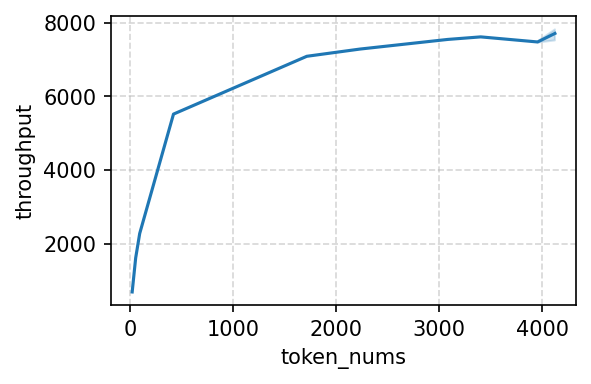

In [38]:
plt.figure(figsize=(4,2.5),dpi=150)
sns.lineplot(
    x="token_nums",
    y="throughput",
    data=no_chunck_result[no_chunck_result["current_stages"] == "prefill"],
)
plt.grid(alpha=0.5, linestyle='--')

<Axes: xlabel='batch_size', ylabel='latency'>

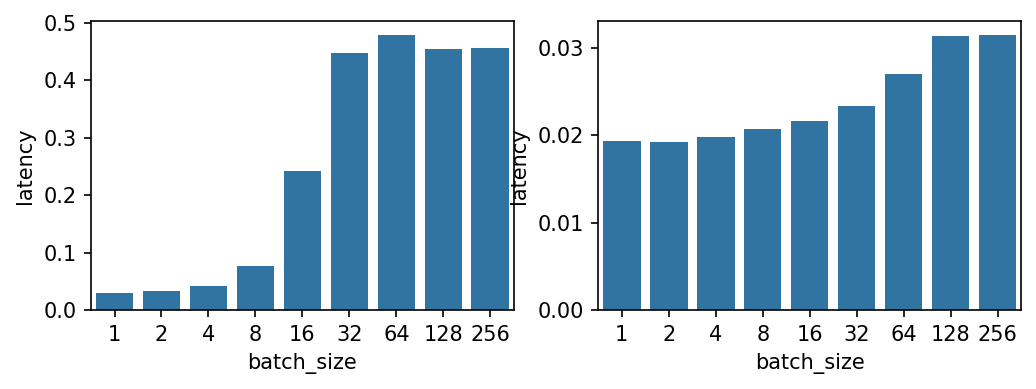

In [4]:
result_mean = (
    no_chunck_result[["batch_size", "latency", "throughput","current_stages"]]
    .groupby(by=["batch_size","current_stages"])
    .mean().reset_index()
)
fig,axes = plt.subplots(1, 2, figsize=(8, 2.5), dpi=150)
sns.barplot(
    data=result_mean[result_mean['current_stages']=='prefill'],
    x="batch_size",
    y="latency",
    ax=axes[0],
)
sns.barplot(
    data=result_mean[result_mean['current_stages']=='decode'],
    x="batch_size",
    y="latency",
    ax=axes[1],
)

# iteration level analysis

In [4]:
# hybrid_iter_level_result_1024 = pd.read_csv(
#     "iter_level/result_continuous_1024_1024_2048_scheduling_policy.csv"
# )
# hybrid_iter_level_result_512 = pd.read_csv(
#     "iter_level/result_continuous_1024_512_2048_scheduling_policy.csv"
# )
# hybrid_iter_level_result_256 = pd.read_csv(
#     "iter_level/result_continuous_1024_256_2048_scheduling_policy.csv"
# )
# hybrid_iter_level_result_128 = pd.read_csv(
#     "iter_level/result_continuous_1024_128_2048_scheduling_policy.csv"
# )

# hybrid_iter_level_result_256.loc[:, "batch_size"] = 256
# hybrid_iter_level_result = pd.concat(
#     [
#         hybrid_iter_level_result_1024,
#         hybrid_iter_level_result_512,
#         hybrid_iter_level_result_256,
#         hybrid_iter_level_result_128,
#     ]
# )
hybrid_iter_level_result = pd.read_csv(
    "iter_level/backup/new_iter_result_continuous_scheduling_policy.csv"
)
# hybrid_iter_level_result = hybrid_iter_level_result[
    # hybrid_iter_level_result["current_stage"].isin(["hybrid", "prefill"])
# ]
# hybrid_iter_level_result = hybrid_iter_level_result[
#     ~hybrid_iter_level_result["throughput"].isin(
#         [
#             hybrid_iter_level_result["throughput"].max(),
#             hybrid_iter_level_result["throughput"].min(),
#         ]
#     )
# ]

hybrid_iter_level_result['wasted_block_ratio']=hybrid_iter_level_result['wasted_block_sizes']/hybrid_iter_level_result['total_block_sizes']

In [5]:
hybrid_iter_level_result_mean = (
    hybrid_iter_level_result[
        ["request_round","current_stage", "batch_size", "policy", "throughput", "latency"]
    ]
    .groupby(["request_round","current_stage", "batch_size", "policy"])
    .mean()
    .reset_index()
)
hybrid_iter_level_result_mean["throughput_mean"] = (
    hybrid_iter_level_result_mean[
        ["throughput", "batch_size", "policy", "current_stage"]
    ]
    .groupby(["batch_size", "policy", "current_stage"])
    .transform("mean")
)
hybrid_iter_level_result_mean["latency_mean"] = (
    hybrid_iter_level_result_mean[["latency", "batch_size", "policy", "current_stage"]]
    .groupby(["batch_size", "policy", "current_stage"])
    .transform("mean")
)

In [6]:
# average recomputed_token_nums for each policy
hybrid_iter_level_recomputed_token_nums = hybrid_iter_level_result[
    [
        "policy",
        "request_round",
        "request_num_each_round",
        "batch_size",
        "num_running_to_waiting",
        "recomputed_token_nums",
        "wasted_block_sizes",
        "current_stage",
        "wasted_block_ratio"
    ]
]

In [7]:
sns.barplot(
    data=hybrid_iter_level_recomputed_token_nums,
    x="batch_size",
    y="latency",
    dodge=True,
    palette="Set2",
    errwidth=1,
    errcolor="black",
    capsize=0.1,
    saturation=1,
    linewidth=1,
    edgecolor="black",
)

ValueError: Could not interpret value `latency` for `y`. An entry with this name does not appear in `data`.

In [8]:
hybrid_iter_level_result

,request_round,latency,request_num_each_round,num_tokens,token_chunk_size,num_running_to_waiting,num_waiting_to_running,recomputed_token_nums,prefill_token_num_each_request,cvs,...,wasted_block_sizes,total_block_sizes,throughput,batch_size,request_num,random_seed,strategy,enable_chunk_prefill,policy,wasted_block_ratio
0,1,0.586143,256,2052,507,0,0,0,"[('200', 507), ('46', 482), ('159', 475), ('15...",1.269265,...,35,2432,3500.850657,128,256,1,hybrid,True,utf,0.014391
1,2,0.314087,256,2052,441,1,0,345,"[('161', 441), ('183', 437), ('33', 435), ('15...",1.269265,...,63,4208,6533.218515,128,256,2,hybrid,True,utf,0.014971
2,3,0.310895,256,2053,419,1,0,41,"[('207', 419), ('188', 414), ('48', 409), ('23...",1.269265,...,96,6272,6603.511312,128,256,3,hybrid,True,utf,0.015306
3,4,0.332054,256,2054,381,1,0,19,"[('220', 381), ('227', 376), ('193', 373), ('1...",1.269265,...,135,8560,6185.738299,128,256,4,hybrid,True,utf,0.015771
4,5,0.330806,256,2054,356,1,0,214,"[('91', 356), ('151', 353), ('179', 346), ('15...",1.269265,...,192,10704,6209.072431,128,256,5,hybrid,True,utf,0.017937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43818,4006,0.024802,1,1,1,0,0,0,[],1.248369,...,0,992,40.319379,512,2048,4006,hybrid,True,fcfs,0.000000
43819,4007,0.025924,1,1,1,0,0,0,[],1.248369,...,15,1008,38.574343,512,2048,4007,hybrid,True,fcfs,0.014881
43820,4008,0.025378,1,1,1,0,0,0,[],1.248369,...,14,1008,39.404226,512,2048,4008,hybrid,True,fcfs,0.013889
43821,4009,0.024716,1,1,1,0,0,0,[],1.248369,...,13,1008,40.459784,512,2048,4009,hybrid,True,fcfs,0.012897


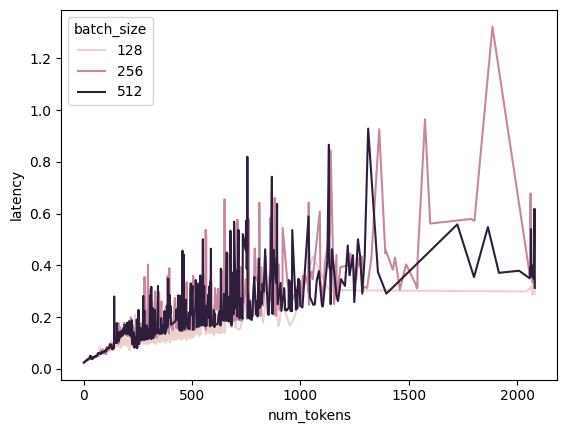

In [9]:
token_latency = hybrid_iter_level_result[hybrid_iter_level_result["policy"] == "fcfs"][['num_tokens','batch_size','latency']]
token_latency = token_latency.groupby(['batch_size','num_tokens']).mean().reset_index()
sns.lineplot(data=token_latency, x="num_tokens", y="latency", hue="batch_size", sort=True, color=sns.color_palette('deep'))
num_tokens=token_latency["num_tokens"].unique()

In [10]:
token_latency

,batch_size,num_tokens,latency
0,128,1,0.024345
1,128,2,0.024739
2,128,3,0.025496
3,128,4,0.026228
4,128,5,0.026933
...,...,...,...
1624,512,2072,0.370825
1625,512,2073,0.375725
1626,512,2076,0.347634
1627,512,2079,0.619039


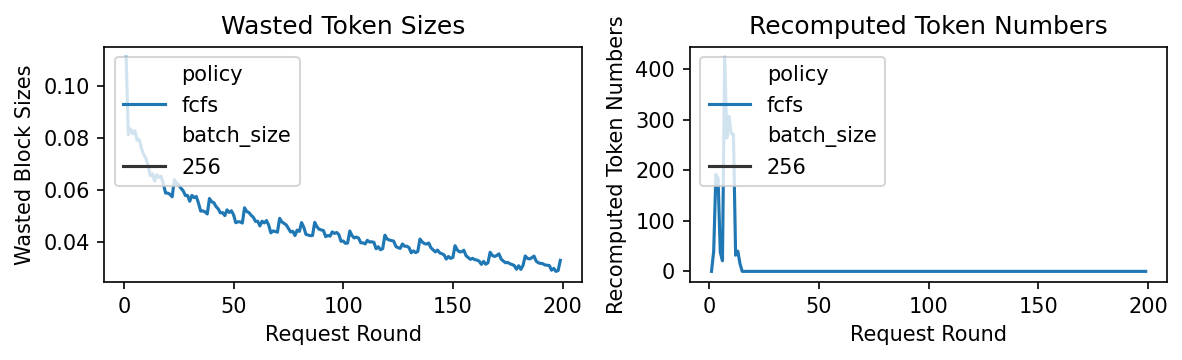

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2.5),dpi=150)
sns.lineplot(
    data=hybrid_iter_level_recomputed_token_nums[(hybrid_iter_level_recomputed_token_nums['policy'] == 'fcfs')&((hybrid_iter_level_recomputed_token_nums['request_round']<200))&(hybrid_iter_level_recomputed_token_nums['batch_size']==256)],
    x="request_round",
    y="wasted_block_ratio",
    hue="policy",
    style="batch_size",
    ax=axes[0]
)
sns.lineplot(
    data=hybrid_iter_level_recomputed_token_nums[(hybrid_iter_level_recomputed_token_nums['policy'] == 'fcfs')&(hybrid_iter_level_recomputed_token_nums['request_round']<200)&(hybrid_iter_level_recomputed_token_nums['batch_size']==256)],
    x="request_round",
    y="recomputed_token_nums",
    hue="policy",
    style="batch_size",
    ax=axes[1]
)

# axes[0].set_yscale('symlog')
# axes[1].set_yscale('symlog')
axes[0].set_title('Wasted Token Sizes')
axes[1].set_title('Recomputed Token Numbers')
axes[0].set_xlabel('Request Round')
axes[1].set_xlabel('Request Round')
axes[0].set_ylabel('Wasted Block Sizes')
axes[1].set_ylabel('Recomputed Token Numbers')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
plt.tight_layout()

plt.show()

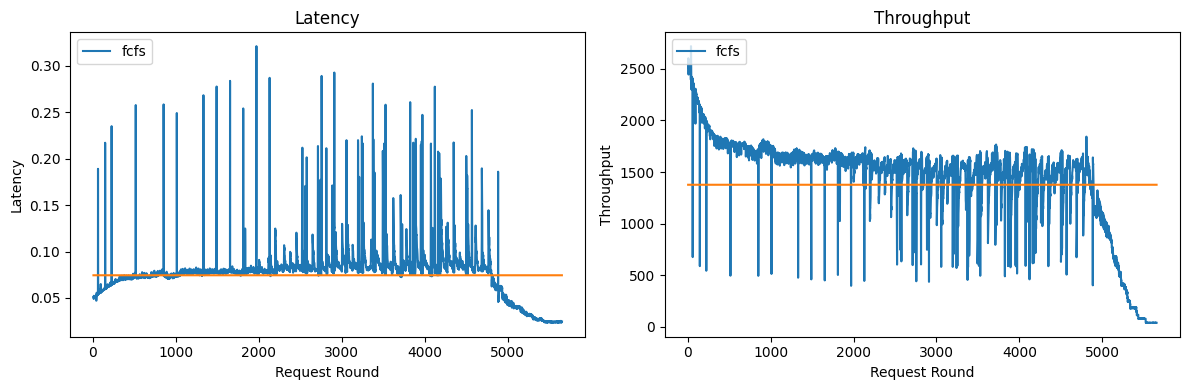

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_data=hybrid_iter_level_result[
        (hybrid_iter_level_result["policy"].isin(["fcfs"]))
        & (hybrid_iter_level_result["batch_size"] == 128)
        & (hybrid_iter_level_result["current_stage"] == "decode")
    ]
ax = sns.lineplot(
    data=plot_data,
    x="request_round",
    y="latency",
    hue="policy",
    # style="current_stage",
    ax=axes[0]
)
sns.lineplot(
    data=plot_data,
    x="request_round",
    y="throughput",
    hue="policy",
    # style="current_stage",
    ax=axes[1]
)
sns.lineplot(
    x="request_round",
    y=plot_data["latency"].mean(),
    data=plot_data,
    ax=axes[0]
)
# sns.lineplot(
#     x="request_round",
#     y="request_num_each_round",
#     data=plot_data,
#     ax=axes[0]
# )
sns.lineplot(
    x="request_round",
    y=plot_data["throughput"].mean(),
    data=plot_data,
    ax=axes[1]
)
axes[0].set_title('Latency')
axes[1].set_title('Throughput')
axes[0].set_xlabel('Request Round')
axes[1].set_xlabel('Request Round')
axes[0].set_ylabel('Latency')
axes[1].set_ylabel('Throughput')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
plt.tight_layout()

/tmp/ipykernel_5995/3162619210.py:19: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(
/tmp/ipykernel_5995/3162619210.py:30: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(


<Figure size 600x375 with 0 Axes>

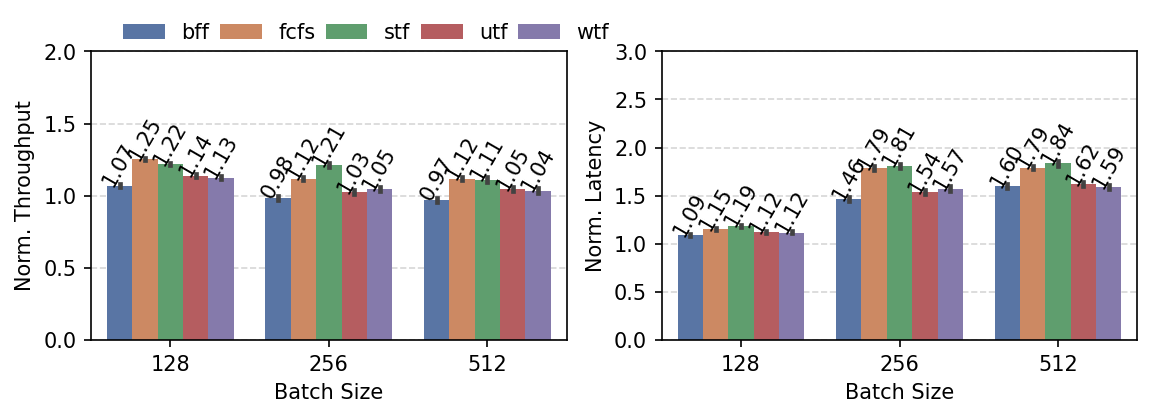

In [13]:
plt.figure(figsize=(4, 2.5), dpi=150)
hybrid_iter_level_result_mean.loc[:, "throughput_mean_ratio"] = (
    hybrid_iter_level_result_mean["throughput_mean"]
    / hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["policy"] == "fcfs"][
        "throughput_mean"
    ].min()
)

hybrid_iter_level_result_mean.loc[:, "latency_mean_ratio"] = (
    hybrid_iter_level_result_mean["latency_mean"]
    / hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["policy"] == "fcfs"][
        "latency_mean"
    ].min()
)
# hybrid_iter_level_result_mean.loc[:, "policy"] = hybrid_iter_level_result_mean.loc[
#     :, "policy"
# ].replace("test", "UP")
fig, axes = plt.subplots(1, 2, figsize=(9, 2.5), dpi=150)
sns.barplot(
    hue="policy",
    y="throughput_mean_ratio",
    x="batch_size",
    data=hybrid_iter_level_result_mean,
    zorder=2,
    ax=axes[0],
    width=0.8,
    palette=sns.color_palette("deep"),
)

sns.barplot(
    hue="policy",
    y="latency_mean_ratio",
    x="batch_size",
    data=hybrid_iter_level_result_mean,
    zorder=2,
    legend=False,
    ax=axes[1],
    palette=sns.color_palette("deep"),
)

axes[0].set_ylabel("Norm. Throughput")
axes[1].set_ylabel("Norm. Latency")
axes[0].legend(frameon=False,loc=(0.05,1),ncols=5, columnspacing=0.5)
# axes[1].legend(frameon=False)
axes[0].set_xlabel("Batch Size")
axes[1].set_xlabel("Batch Size")
for p in axes[0].patches:
    # print(p.get_height())
    if p.get_height()==0:
        continue
    axes[0].annotate(
        r"{:.2f}".format(p.get_height(), 2),
        (p.get_x() + p.get_width() / 2.0, p.get_height()*1),
        ha="center",
        va="center",
        xytext=(0, 10),
        rotation=60,
        textcoords="offset points",
    )
for p in axes[1].patches:
    # print(p.get_height())
    if p.get_height()==0:
        continue
    axes[1].annotate(
        r"{:.2f}".format(p.get_height(), 2),
        (p.get_x() + p.get_width() / 2.0, p.get_height()*1),
        ha="center",
        va="center",
        xytext=(0, 10),
        rotation=60,
        textcoords="offset points",
    )
    
axes[0].set_ylim(0, 2)
axes[1].set_ylim(0, 3.0)
axes[0].grid(axis="y", alpha=0.5, linestyle="--", zorder=-2)
axes[1].grid(axis="y", alpha=0.5, linestyle="--", zorder=-2)

/tmp/ipykernel_5995/856164276.py:19: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(
/tmp/ipykernel_5995/856164276.py:30: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(


<Figure size 600x375 with 0 Axes>

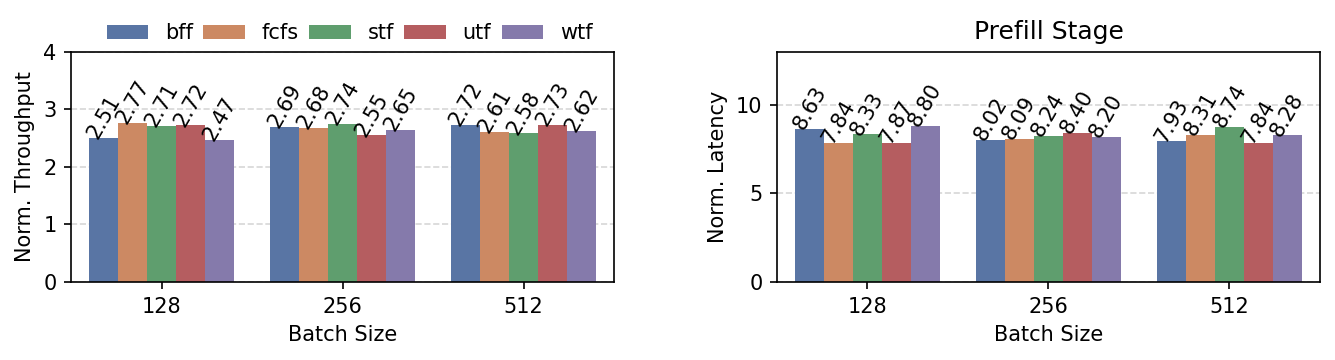

In [16]:
plt.figure(figsize=(4, 2.5), dpi=150)
hybrid_iter_level_result_mean.loc[:, "throughput_mean_ratio"] = (
    hybrid_iter_level_result_mean["throughput_mean"]
    / hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["policy"] == "fcfs"][
        "throughput_mean"
    ].min()
)

hybrid_iter_level_result_mean.loc[:, "latency_mean_ratio"] = (
    hybrid_iter_level_result_mean["latency_mean"]
    / hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["policy"] == "fcfs"][
        "latency_mean"
    ].min()
)
# hybrid_iter_level_result_mean.loc[:, "policy"] = hybrid_iter_level_result_mean.loc[
#     :, "policy"
# ].replace("test", "UP")
fig, axes = plt.subplots(1, 2, figsize=(9, 2.5), dpi=150)
sns.barplot(
    hue="policy",
    y="throughput_mean_ratio",
    x="batch_size",
    data=hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["current_stage"]=="prefill"],
    zorder=2,
    ax=axes[0],
    width=0.8,
    palette=sns.color_palette("deep"),
)

sns.barplot(
    hue="policy",
    y="latency_mean_ratio",
    x="batch_size",
    data=hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["current_stage"]=="prefill"],
    zorder=2,
    legend=False,
    ax=axes[1],
    palette=sns.color_palette("deep"),
)
axes[0].set_ylabel("Norm. Throughput")
axes[1].set_ylabel("Norm. Latency")
axes[0].legend(frameon=False,loc=(0.05,1),ncols=5, columnspacing=0.5)
# axes[1].legend(frameon=False)
axes[0].set_xlabel("Batch Size")
axes[1].set_xlabel("Batch Size")
for p in axes[0].patches:
    # print(p.get_height())
    if p.get_height()==0:
        continue
    axes[0].annotate(
        r"{:.2f}".format(p.get_height(), 2),
        (p.get_x() + p.get_width() / 2.0, p.get_height()*1),
        ha="center",
        va="center",
        xytext=(0, 10),
        rotation=60,
        textcoords="offset points",
    )
for p in axes[1].patches:
    # print(p.get_height())
    if p.get_height()==0:
        continue
    axes[1].annotate(
        r"{:.2f}".format(p.get_height(), 2),
        (p.get_x() + p.get_width() / 2.0, p.get_height()*1),
        ha="center",
        va="center",
        xytext=(0, 10),
        rotation=60,
        textcoords="offset points",
    )
    

axes[0].set_ylim(0, 4)
axes[1].set_ylim(0, 13)
axes[0].grid(axis="y", alpha=0.5, linestyle="--", zorder=-2)
axes[1].grid(axis="y", alpha=0.5, linestyle="--", zorder=-2)
plt.title("Prefill Stage")
plt.tight_layout()
plt.show()

/tmp/ipykernel_5995/3519156683.py:19: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(
/tmp/ipykernel_5995/3519156683.py:30: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(


<Figure size 600x375 with 0 Axes>

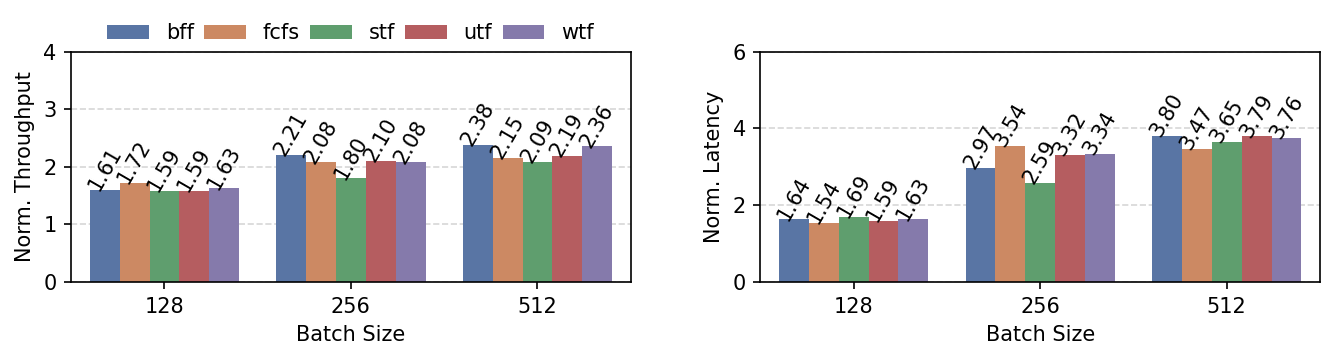

In [15]:
plt.figure(figsize=(4, 2.5), dpi=150)
hybrid_iter_level_result_mean.loc[:, "throughput_mean_ratio"] = (
    hybrid_iter_level_result_mean["throughput_mean"]
    / hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["policy"] == "fcfs"][
        "throughput_mean"
    ].min()
)

hybrid_iter_level_result_mean.loc[:, "latency_mean_ratio"] = (
    hybrid_iter_level_result_mean["latency_mean"]
    / hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["policy"] == "fcfs"][
        "latency_mean"
    ].min()
)
# hybrid_iter_level_result_mean.loc[:, "policy"] = hybrid_iter_level_result_mean.loc[
#     :, "policy"
# ].replace("test", "UP")
fig, axes = plt.subplots(1, 2, figsize=(9, 2.5), dpi=150)
sns.barplot(
    hue="policy",
    y="throughput_mean_ratio",
    x="batch_size",
    data=hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["current_stage"]=="hybrid"],
    zorder=2,
    ax=axes[0],
    width=0.8,
    palette=sns.color_palette("deep"),
)

sns.barplot(
    hue="policy",
    y="latency_mean_ratio",
    x="batch_size",
    data=hybrid_iter_level_result_mean[hybrid_iter_level_result_mean["current_stage"]=="hybrid"],
    zorder=2,
    legend=False,
    ax=axes[1],
    palette=sns.color_palette("deep"),
)
axes[0].set_ylabel("Norm. Throughput")
axes[1].set_ylabel("Norm. Latency")
axes[0].legend(frameon=False,loc=(0.05,1),ncols=5, columnspacing=0.5)
# axes[1].legend(frameon=False)
axes[0].set_xlabel("Batch Size")
axes[1].set_xlabel("Batch Size")
for p in axes[0].patches:
    # print(p.get_height())
    if p.get_height()==0:
        continue
    axes[0].annotate(
        r"{:.2f}".format(p.get_height(), 2),
        (p.get_x() + p.get_width() / 2.0, p.get_height()*1),
        ha="center",
        va="center",
        xytext=(0, 10),
        rotation=60,
        textcoords="offset points",
    )
for p in axes[1].patches:
    # print(p.get_height())
    if p.get_height()==0:
        continue
    axes[1].annotate(
        r"{:.2f}".format(p.get_height(), 2),
        (p.get_x() + p.get_width() / 2.0, p.get_height()*1),
        ha="center",
        va="center",
        xytext=(0, 10),
        rotation=60,
        textcoords="offset points",
    )
    

axes[0].set_ylim(0, 4)
axes[1].set_ylim(0, 6)
axes[0].grid(axis="y", alpha=0.5, linestyle="--", zorder=-2)
axes[1].grid(axis="y", alpha=0.5, linestyle="--", zorder=-2)
plt.tight_layout()
plt.show()

<Axes: xlabel='request_round', ylabel='wasted_block_ratio'>

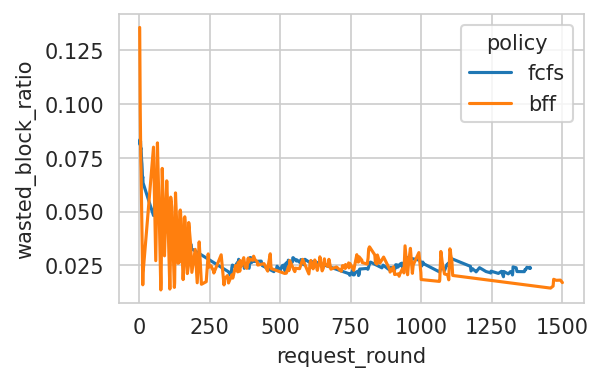

In [71]:
plt.figure(figsize=(4, 2.5), dpi=150)
sns.lineplot(
    x="request_round",
    y="wasted_block_ratio",
    hue="policy",
    data=hybrid_iter_level_result[hybrid_iter_level_result['policy'].isin(['fcfs','bff'])&(hybrid_iter_level_result['batch_size']==256)&(hybrid_iter_level_result['request_round']< 2500)&(hybrid_iter_level_result['current_stage']=='hybrid')],
)

# plt.yscale('log')

<Axes: xlabel='batch_size', ylabel='wasted_block_ratio'>

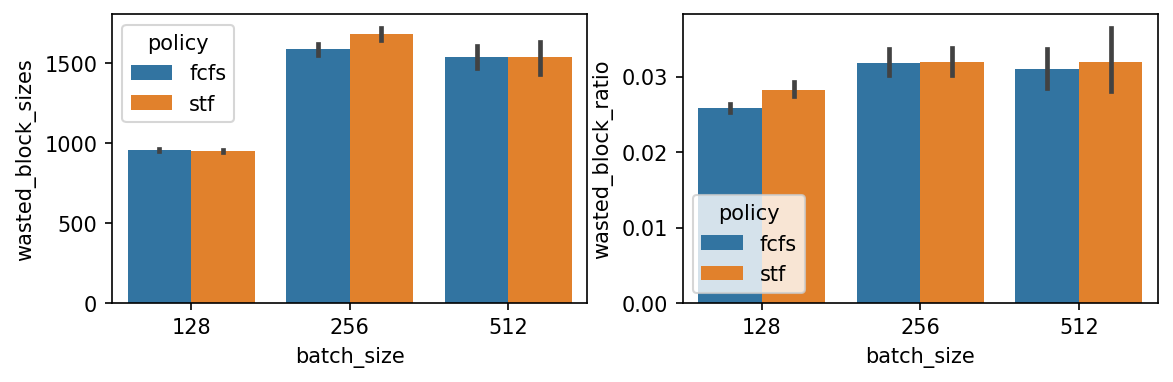

In [51]:
fig, axes=plt.subplots(1, 2, figsize=(9, 2.5), dpi=150)
sns.barplot(
    y="wasted_block_sizes",
    x="batch_size",
    hue="policy",
    data=hybrid_iter_level_result[
        (hybrid_iter_level_result["policy"].isin(["fcfs", "stf"]))&(hybrid_iter_level_result['current_stage']=='hybrid')
    ],
    ax=axes[0],
)
sns.barplot(
    x="batch_size",
    y="wasted_block_ratio",
    hue="policy",
    data=hybrid_iter_level_result[
        (hybrid_iter_level_result["policy"].isin(["fcfs", "stf"])) &(hybrid_iter_level_result['current_stage']=='hybrid')
    ],
    ax=axes[1],
)

# Request level analysis

In [52]:
data = pd.read_csv("request_level/request_result_32_32_2048.csv")
data.loc[:, "strategy"] = data["strategy"].replace(
    {
        "hybrid_3_1": "1P:3D",
        "hybrid_2_2": "2P:2D",
        "hybrid_1_3": "3P:1D",
        "full": "Full",
    }
)
data = data[data["decode_length"] == 100]
data = data[
    (data["strategy"] == "Full") & (data["enable_chunk_prefill"] == False)
    | (data["strategy"] == "2P:2D") & (data["enable_chunk_prefill"] == True)
]

FileNotFoundError: [Errno 2] No such file or directory: 'request_level/request_result_32_32_2048.csv'

NameError: name 'data' is not defined

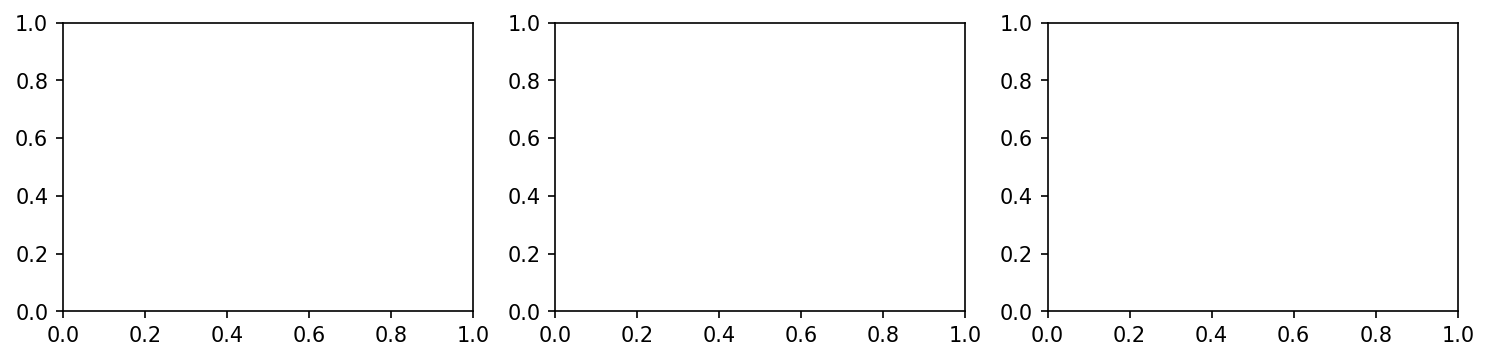

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(12, 2.5), dpi=150)
sns.ecdfplot(
    x="latency",
    hue="strategy",
    data=data[data["enable_chunk_prefill"]],
    ax=axes[0],
)
sns.ecdfplot(
    x="latency", hue="strategy", data=data[~data["enable_chunk_prefill"]], ax=axes[1]
)
sns.ecdfplot(x="latency", hue="enable_chunk_prefill", data=data, ax=axes[2])
axes[0].set_title("Chunk prefill")
axes[1].set_title("No chunk prefill")
axes[2].set_title("Full")

NameError: name 'data' is not defined

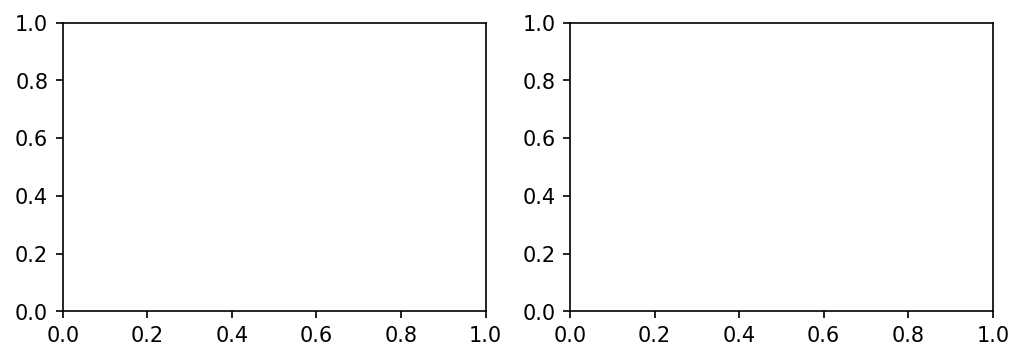

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2.5), dpi=150)
sns.lineplot(
    x="request_id",
    y="latency",
    hue="strategy",
    data=data[data["enable_chunk_prefill"]],
    ax=axes[0],
)
sns.lineplot(
    x="request_id",
    y="latency",
    hue="strategy",
    data=data[~data["enable_chunk_prefill"]],
    ax=axes[1],
)
# axes[0].set_ylim(0,25)
# axes[1].set_ylim(0,25)

# Request level continuous analysis

In [55]:
# data_128 = pd.read_csv(
#     "request_level/request_result_continuous_1024_128_2048_scheduling_policy.csv"
# )

# data_256 = pd.read_csv(
#     "request_level/request_result_continuous_1024_256_2048_scheduling_policy.csv"
# )
# data_256.loc[:, "batch_size"] = 256
# data_512 = pd.read_csv(
#     "request_level/request_result_continuous_1024_512_2048_scheduling_policy.csv"
# )
# data_1024 = pd.read_csv(
#     "request_level/request_result_continuous_1024_1024_2048_scheduling_policy.csv"
# )
# data = pd.concat([data_128, data_256, data_512, data_1024])
# data = data[data['decode_length']==100]
data = pd.read_csv("request_level/request_result_continuous_scheduling_policy.csv")

In [56]:
data0 = data[data["policy"] == "utf"]
data1 = data[data["policy"] == "fcfs"]
merged_data = pd.merge(
    data0, data1, how="outer", on=["request_id", "strategy", "random_seed"]
)

In [57]:
request_ids = merged_data[
    (merged_data["prompt_length_x"] == merged_data["prompt_length_y"])
    & (merged_data["decode_length_x"] == merged_data["decode_length_y"])
]["request_id"]
data = data[data["request_id"].isin(request_ids)]

In [58]:
fcfs_result = data[data["policy"] == "fcfs"]
bff_result = data[data["policy"] == "bff"]
compared_result = pd.merge(
    fcfs_result, bff_result, how="outer", on=["request_id", "strategy", "batch_size","random_seed"]
)
compared_result[compared_result['latency_x']>compared_result["latency_y"]].groupby(['batch_size']).count().reset_index()[['batch_size','request_id']]/1024

,batch_size,request_id
0,0.125,0.503906
1,0.250,0.333984
2,0.500,0.401367


/tmp/ipykernel_1764235/1623948705.py:3: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(
/tmp/ipykernel_1764235/1623948705.py:13: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.ecdfplot(
/tmp/ipykernel_1764235/1623948705.py:20: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.ecdfplot(
/tmp/ipykernel_1764235/1623948705.py:27: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.ecdfplot(


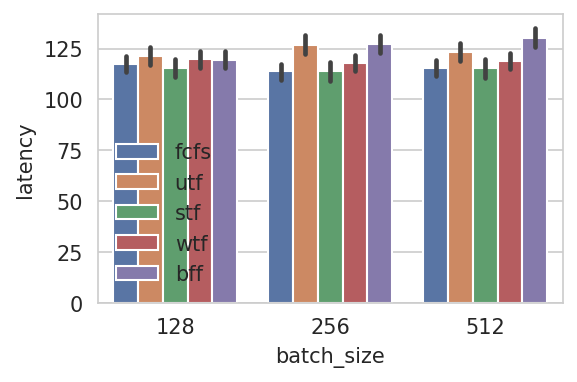

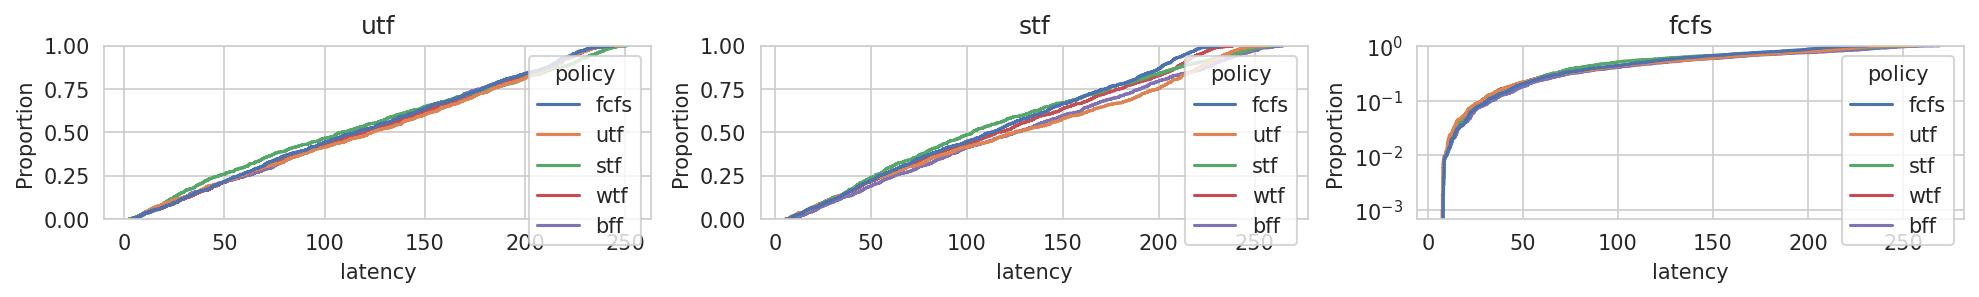

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(4, 2.5), dpi=150)
sns.barplot(
    hue="policy",
    y="latency",
    x="batch_size",
    data=data,
    palette=sns.color_palette("deep"),
)
plt.legend(frameon=False)
fig, axes = plt.subplots(1, 3, figsize=(16, 1.5), dpi=150)

sns.ecdfplot(
    x="latency",
    hue="policy",
    data=data[data["batch_size"] ==128],
    ax=axes[0],
    palette=sns.color_palette("deep"),
)
sns.ecdfplot(
    x="latency",
    hue="policy",
   data=data[data["batch_size"] == 256],
    ax=axes[1],
    palette=sns.color_palette("deep"),
)
sns.ecdfplot(
    x="latency",
    hue="policy",
    data=data[data["batch_size"] == 512],
    ax=axes[2],
    palette=sns.color_palette("deep"),
)

axes[0].set_title("utf")
axes[1].set_title("stf")
axes[2].set_title("fcfs")

axes[2].set_yscale("log")

In [63]:
data['seq_length'] = data["prompt_length"] + data["decode_length"]
data['avg_throughput_per_seq'] = data['seq_length'] / data['latency']

<Axes: xlabel='latency', ylabel='Proportion'>

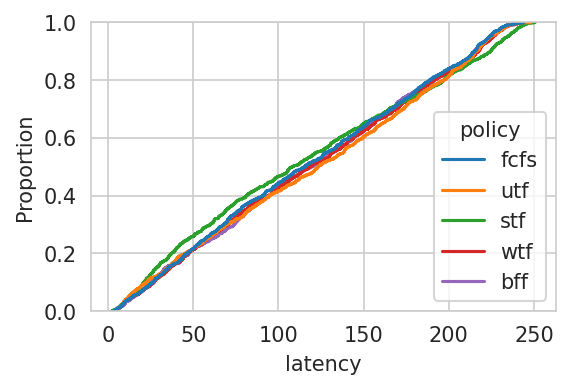

In [64]:
plt.figure(figsize=(4, 2.5), dpi=150)
sns.ecdfplot(x="latency", hue="policy", data=data[data['batch_size']==128])


<Axes: xlabel='avg_throughput_per_seq', ylabel='Proportion'>

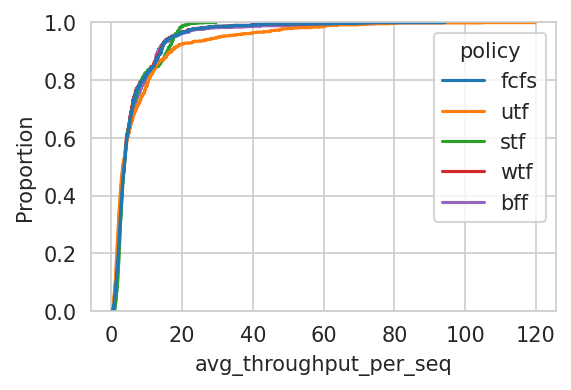

In [65]:
plt.figure(figsize=(4, 2.5), dpi=150)
sns.ecdfplot(x="avg_throughput_per_seq", hue="policy", data=data[data['batch_size']==128])